In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
import os
import json
import dash
import shap
import plotly.express as px
import plotly.graph_objects as go
from dash import dcc, html
from dash.dependencies import Input, Output
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

In [5]:
data.describe(include='all')

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
count,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000
unique,2000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,LU0000,Lung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,1,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1574
mean,NaN,NaN,63.248000,0.489000,5.157000,5.035000,5.967500,0.194500,5.189500,4.563500,...,4.015000,5.323000,4.979000,0.032500,0.19650,3.94050,0.454449,26.183350,4.938500,NaN
std,NaN,NaN,10.462946,0.500004,3.325339,3.260996,3.061393,0.395914,3.154452,3.088323,...,2.978458,3.207462,3.212899,0.177368,0.39745,3.04887,0.123074,3.947459,3.166027,NaN
min,NaN,NaN,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.029285,15.000000,0.000000,NaN
25%,NaN,NaN,56.000000,0.000000,2.000000,2.000000,4.000000,0.000000,3.000000,2.000000,...,1.000000,3.000000,2.000000,0.000000,0.00000,1.00000,0.366982,23.500000,2.000000,NaN
50%,NaN,NaN,64.000000,0.000000,5.000000,5.000000,6.000000,0.000000,5.000000,4.000000,...,4.000000,5.000000,5.000000,0.000000,0.00000,4.00000,0.455399,26.200000,5.000000,NaN
75%,NaN,NaN,70.000000,1.000000,8.000000,8.000000,9.000000,0.000000,8.000000,7.000000,...,6.000000,8.000000,8.000000,0.000000,0.00000,6.00000,0.539782,28.700000,8.000000,NaN


In [6]:
data.columns.tolist()

['Patient_ID',
 'Cancer_Type',
 'Age',
 'Gender',
 'Smoking',
 'Alcohol_Use',
 'Obesity',
 'Family_History',
 'Diet_Red_Meat',
 'Diet_Salted_Processed',
 'Fruit_Veg_Intake',
 'Physical_Activity',
 'Air_Pollution',
 'Occupational_Hazards',
 'BRCA_Mutation',
 'H_Pylori_Infection',
 'Calcium_Intake',
 'Overall_Risk_Score',
 'BMI',
 'Physical_Activity_Level',
 'Risk_Level']

In [8]:
le_cancer = LabelEncoder()
data['Cancer_Type'] = le_cancer.fit_transform(data['Cancer_Type'])
le_risk = LabelEncoder()
data['Risk_Level'] = le_risk.fit_transform(data['Risk_Level'])

In [9]:
features = [col for col in data.columns if col not in ['Patient_ID', 'Risk_Level']]
X = data[features]
y = data['Risk_Level']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(random_state=42,n_estimators=100)
print("Training the model...")
model.fit(X_train, y_train)
print("Model training completed.")

Training the model...
Model training completed.


In [12]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00       315

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[ 20   0   0]
 [  0  65   0]
 [  0   0 315]]


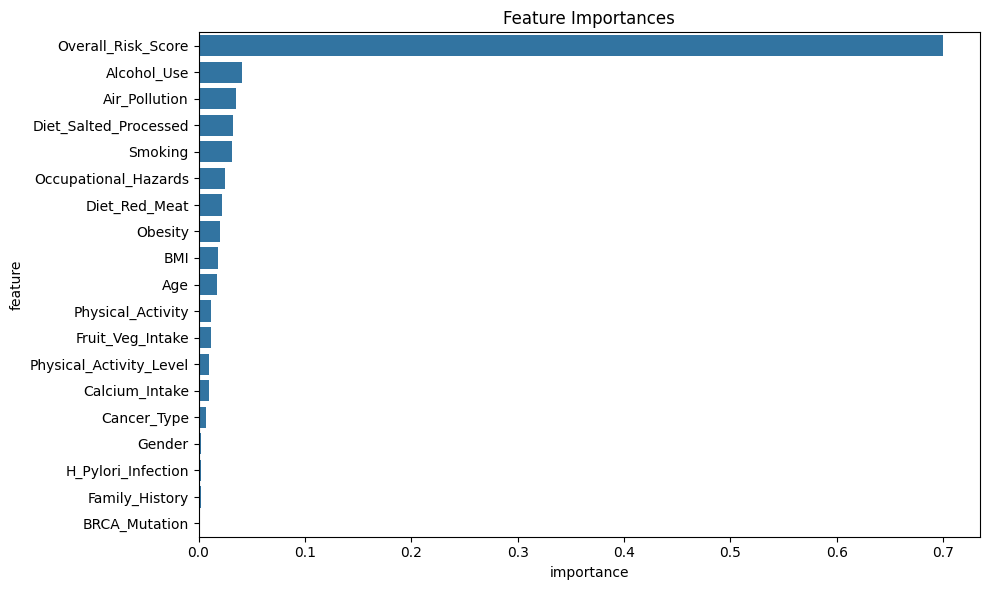

In [14]:
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x='importance', y='feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_risk.classes_)
disp.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.close()
plt.savefig('confusion_matrix.png')
plt.show()

<Figure size 640x480 with 0 Axes>

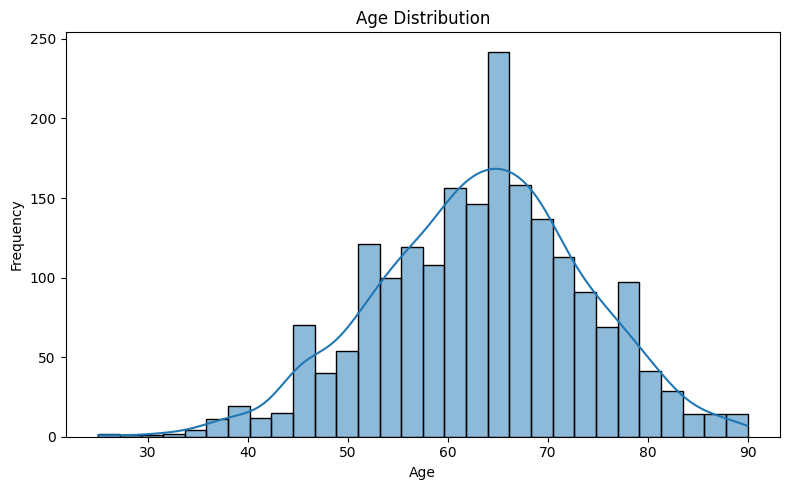

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

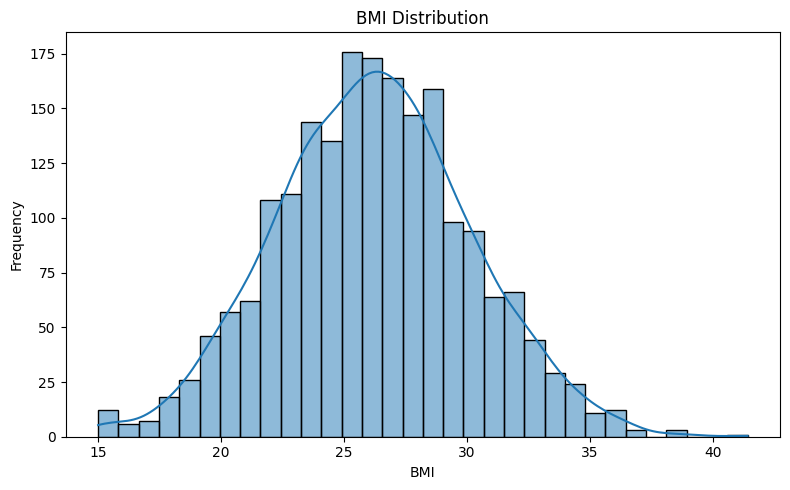

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('bmi_distribution.png')
plt.show()

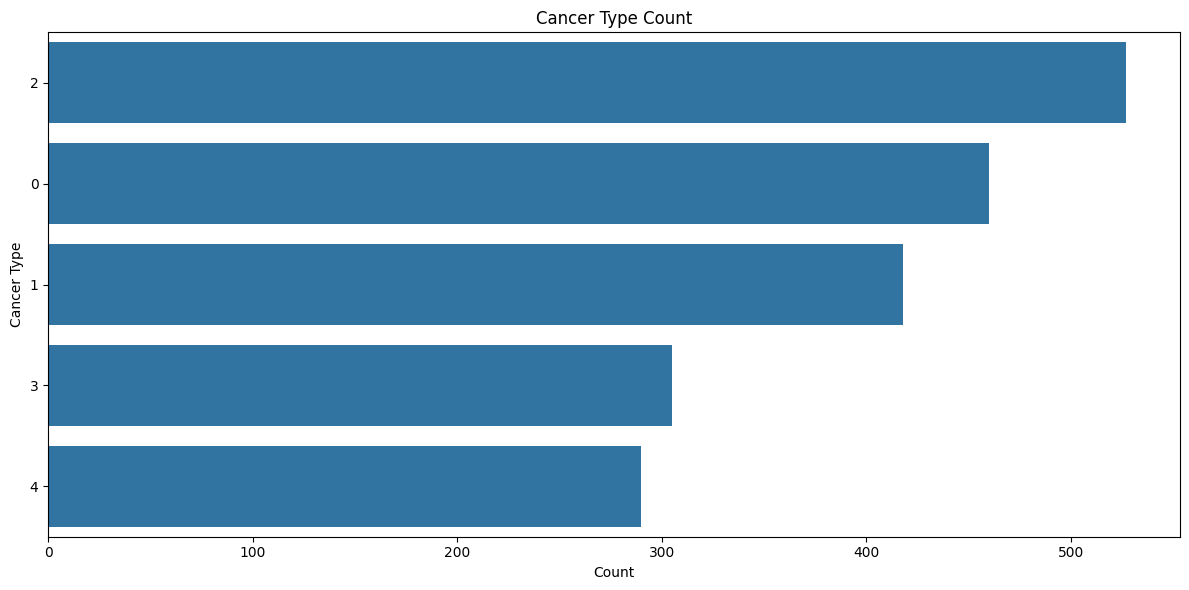

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Cancer_Type', data=data,
              order=data['Cancer_Type'].value_counts().index)
plt.title('Cancer Type Count')
plt.ylabel('Cancer Type')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig('cancer_type_count.png')
plt.show()

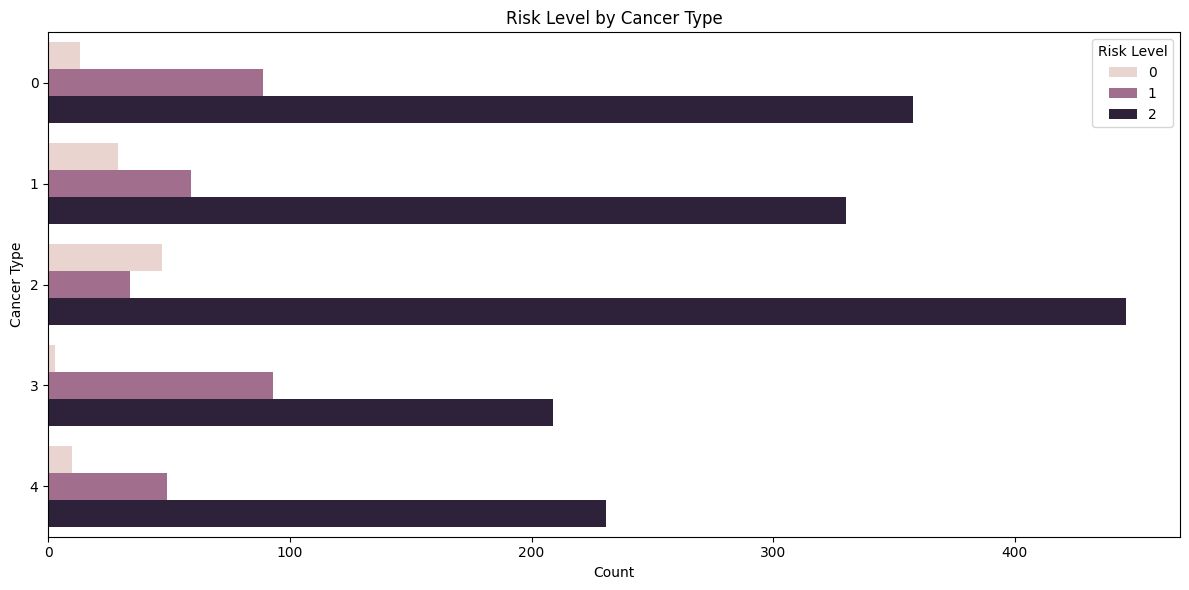

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Cancer_Type', hue='Risk_Level', data=data)
plt.title('Risk Level by Cancer Type')
plt.ylabel('Cancer Type')
plt.xlabel('Count')
plt.legend(title='Risk Level')
plt.tight_layout()
plt.savefig('risk_cancer_type.png')
plt.show()

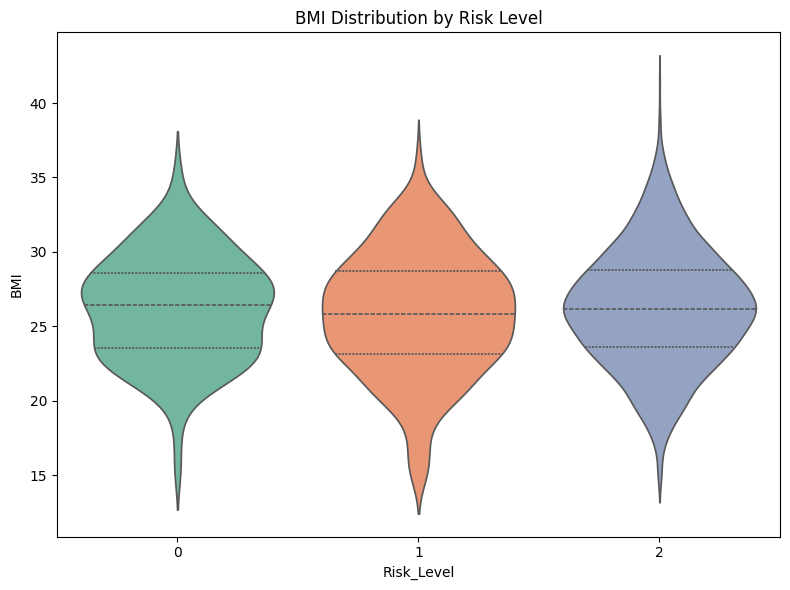

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(data=data, x='Risk_Level', y='BMI', palette='Set2', inner='quartile')
plt.title('BMI Distribution by Risk Level')
plt.tight_layout()
plt.savefig('violin_bmi_risk.png')
plt.show()

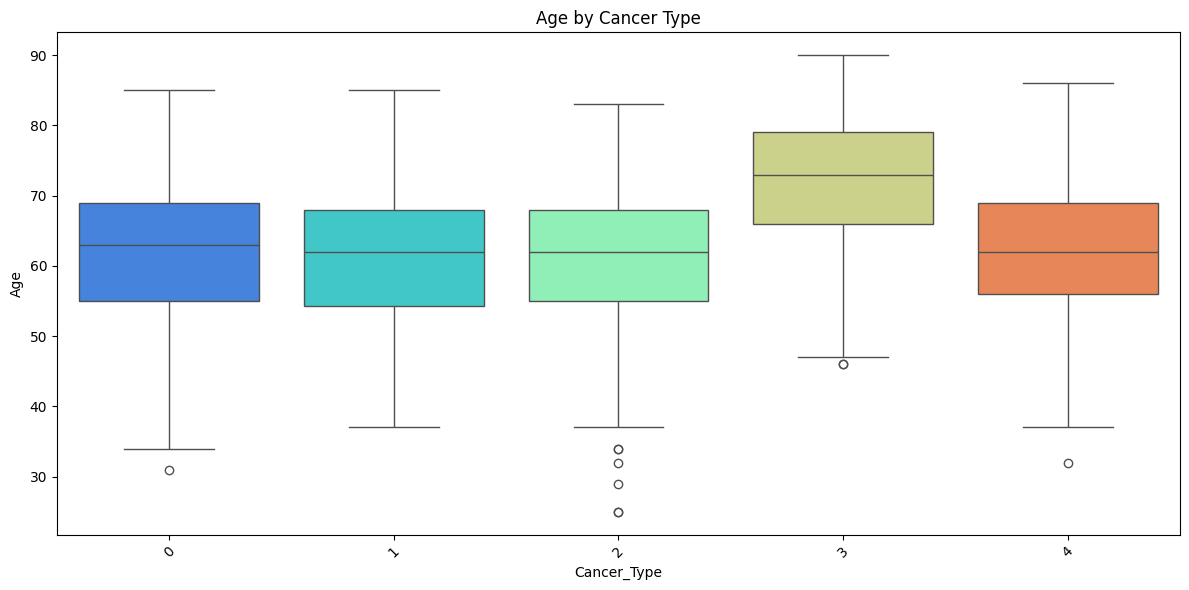

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Cancer_Type', y='Age', palette='rainbow')
plt.title('Age by Cancer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_age_cancer.png')
plt.show()

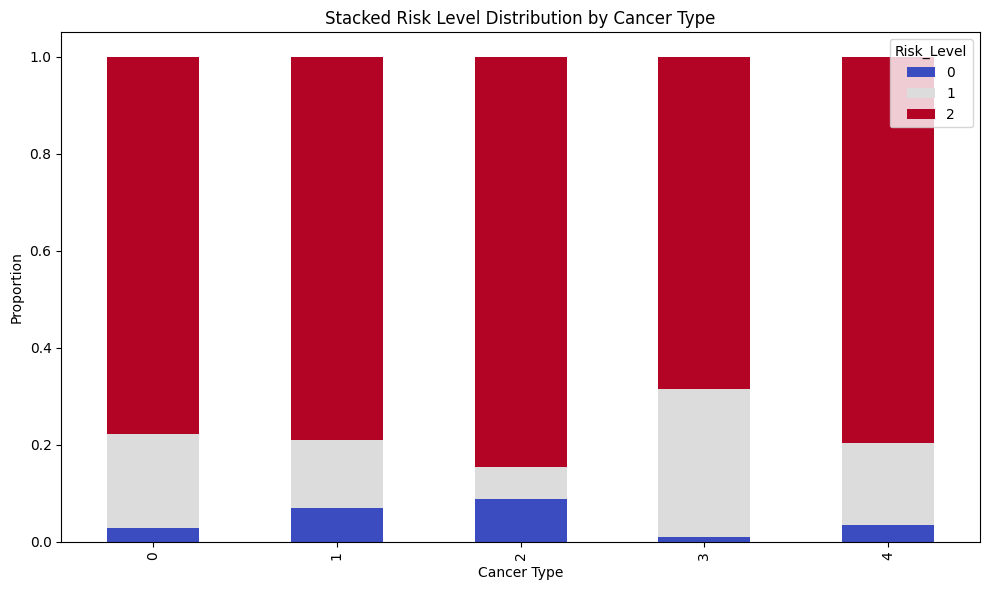

In [30]:
risk_crosstab = pd.crosstab(data['Cancer_Type'], data['Risk_Level'], normalize='index')
risk_crosstab.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))
plt.title('Stacked Risk Level Distribution by Cancer Type')
plt.ylabel('Proportion')
plt.xlabel('Cancer Type')
plt.tight_layout()
plt.savefig('stacked_risk_cancer.png')
plt.show()

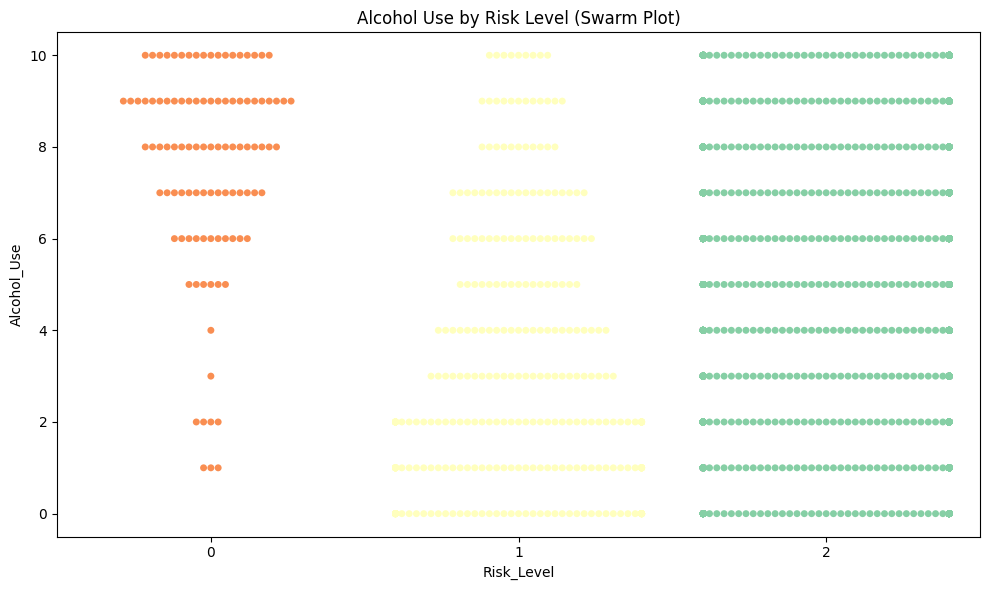

In [31]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=data, x='Risk_Level', y='Alcohol_Use', palette='Spectral')
plt.title('Alcohol Use by Risk Level (Swarm Plot)')
plt.tight_layout()
plt.savefig('swarm_alcohol_risk.png')
plt.show()

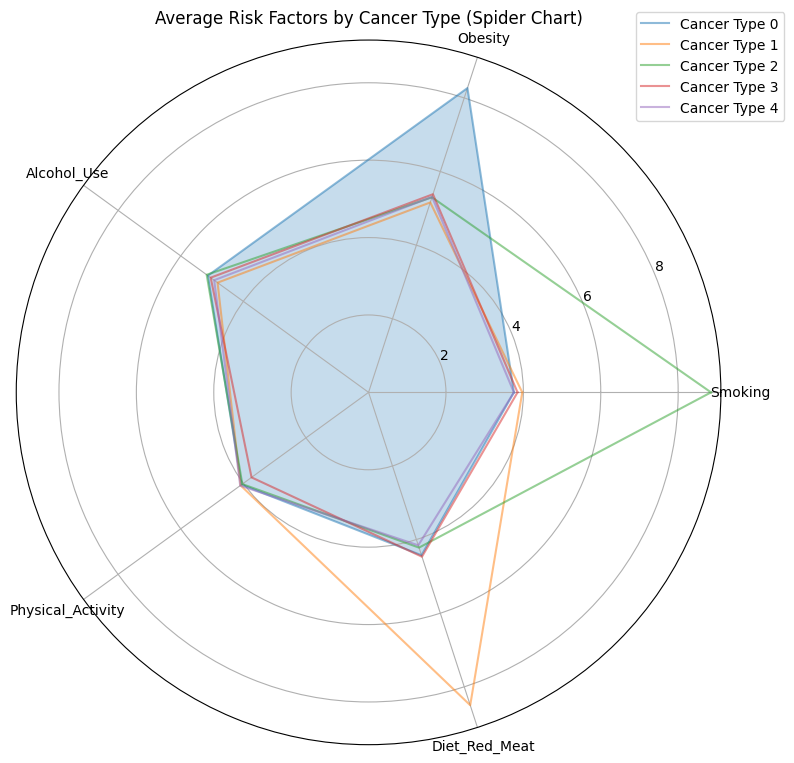

In [32]:
categories = ['Smoking','Obesity','Alcohol_Use','Physical_Activity','Diet_Red_Meat']
means = data.groupby('Cancer_Type')[categories].mean()
labels=np.array(categories)
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))
for idx, (t, row) in enumerate(means.iterrows()):
    stats = row.values.tolist()
    stats += stats[:1]
    plt.polar(angles, stats, label=f'Cancer Type {t}', alpha=0.5)
plt.fill(angles, means.iloc[0].tolist() + [means.iloc[0][0]], alpha=0.25)
plt.xticks(angles[:-1], labels)
plt.title('Average Risk Factors by Cancer Type (Spider Chart)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig('spider_risk_cancer.png')

In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
animation_frames = 40

violin_frames = [
    go.Frame(
        data=[
            go.Violin(y=data.loc[:int(len(data)/(animation_frames)*(k+1)), 'BMI'], x=data.loc[:int(len(data)/(animation_frames)*(k+1)), 'Risk_Level'],
                      box_visible=True, meanline_visible=True, line_color='lightblue')
        ],
        name=f'Frame {k}'
    ) for k in range(animation_frames)
]
violin_fig = go.Figure(
    data=[go.Violin(y=[], x=[], box_visible=True, meanline_visible=True, line_color='lightblue')],
    frames=violin_frames,
)
violin_fig.update_layout(updatemenus=[{"type": "buttons",
                                       "buttons": [{"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 80, "redraw": True}}]}]}],
                        title="BMI Distribution by Risk Level (Animated)")

box_frames = [
    go.Frame(
        data=[go.Box(y=data.loc[data['Cancer_Type'] == t, 'Age'],
                     name=str(t)) for t in data['Cancer_Type'].unique()[:k+1]],
        name=f'Frame {k}'
    ) for k in range(len(data['Cancer_Type'].unique()))
]
box_fig = go.Figure(
    data=[],
    frames=box_frames
)
box_fig.update_layout(updatemenus=[{"type": "buttons",
                                    "buttons": [{"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 200, "redraw": True}}]}]}],
                     title="Age by Cancer Type (Animated Build-up)")

risk_crosstab = pd.crosstab(data['Cancer_Type'], data['Risk_Level'], normalize='index')
bar_frames = [
    go.Frame(
        data=[
            go.Bar(
                x=risk_crosstab.index,
                y=risk_crosstab.iloc[:, :k+1].sum(axis=1),
                marker_color='blue'
            )
        ],
        name=f'Frame {k}'
    )
    for k in range(risk_crosstab.shape[1])
]
bar_fig = go.Figure(
    data=[go.Bar(x=[], y=[])],
    frames=bar_frames
)
bar_fig.update_layout(updatemenus=[{"type": "buttons",
                                    "buttons": [{"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 200, "redraw": True}}]}]}],
                     title="Risk Level Distribution by Cancer Type (Animated)")

swarm_fig = px.strip(data, x='Risk_Level', y='Alcohol_Use', color='Risk_Level', animation_frame='Risk_Level',
                     title="Alcohol Use by Risk Level (Swarm/Animated)")
swarm_fig.update_traces(jitter=1)

count_data = data.groupby(['Risk_Level', 'Gender']).size().reset_index(name='count')
count_fig = px.bar(count_data, x='Risk_Level', y='count', color='Gender', animation_frame='Gender',
                   title="Risk Level Count by Gender (Animated)")

categories = ['Smoking','Obesity','Alcohol_Use','Physical_Activity','Diet_Red_Meat']
means = data.groupby('Cancer_Type')[categories].mean()
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]
radar_frames = []
for idx, t in enumerate(means.index):
    stats = means.loc[t].tolist() + [means.loc[t].tolist()[0]]
    radar_frames.append(
        go.Frame(
            data=[go.Scatterpolar(r=stats, theta=categories + [categories[0]], fill='toself', name=f'Cancer Type {t}')],
            name=f'Frame {idx}'
        )
    )

radar_fig = go.Figure(
    data=[go.Scatterpolar(r=means.iloc[0].tolist() + [means.iloc[0].tolist()[0]], theta=categories + [categories[0]], fill='toself')],
    frames=radar_frames
)
radar_fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, np.max(means[categories].values)])),
    showlegend=True,
    updatemenus=[{"type": "buttons",
                  "buttons": [{"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 400, "redraw": True}}]}]}],
    title="Risk Factors by Cancer Type (Spider Chart/Animated)"
)

corr_fig = px.imshow(data[categories].corr(), text_auto=True, title="Feature Correlation Heatmap (Animated)")
pca_fig = px.scatter(data, x='Age', y='BMI', color='Risk_Level', animation_frame='Risk_Level', title="PCA-like Scatter by Risk Level (Animated)")
roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=[0, 0.1, 0.3, 1], y=[0, 0.6, 0.9, 1], mode='lines', name='High'))
roc_fig.add_trace(go.Scatter(x=[0, 0.05, 0.2, 1], y=[0, 0.5, 0.8, 1], mode='lines', name='Low'))
roc_fig.add_trace(go.Scatter(x=[0, 0.08, 0.18, 1], y=[0, 0.7, 0.95, 1], mode='lines', name='Medium'))
roc_fig.update_layout(title="Multiclass ROC Curves (Animated)",
                     updatemenus=[{"type": "buttons",
                        "buttons": [{"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 300, "redraw": True}}]}]}])

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
le_cancer = LabelEncoder()
data['Cancer_Type'] = le_cancer.fit_transform(data['Cancer_Type'])
le_risk = LabelEncoder()
data['Risk_Level'] = le_risk.fit_transform(data['Risk_Level'])
features = [col for col in data.columns if col not in ['Patient_ID', 'Risk_Level']]
X = data[features]
y = data['Risk_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
feat_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
fi_frames = [
    go.Frame(
        data=[go.Bar(x=feat_imp.index[:k+1], y=feat_imp.values[:k+1])],
        name=f'Frame {k}'
    ) for k in range(len(feat_imp))
]
fi_fig = go.Figure(
    data=[go.Bar(x=[], y=[])],
    frames=fi_frames
)
fi_fig.update_layout(title="Feature Importance (Animated)",
    updatemenus=[{"type": "buttons",
                  "buttons": [{"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 160, "redraw": True}}]}]}])

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Comprehensive Cancer Dataset Dashboard with Animations"),
    dcc.Tabs([
        dcc.Tab(label="BMI Violin Plot", children=[dcc.Graph(figure=violin_fig)]),
        dcc.Tab(label="Age Boxplot by Cancer Type", children=[dcc.Graph(figure=box_fig)]),
        dcc.Tab(label="Stacked Bar (Risk Levels)", children=[dcc.Graph(figure=bar_fig)]),
        dcc.Tab(label="Alcohol Use Swarm Plot", children=[dcc.Graph(figure=swarm_fig)]),
        dcc.Tab(label="Risk Count by Gender", children=[dcc.Graph(figure=count_fig)]),
        dcc.Tab(label="Spider Chart Cancer Types", children=[dcc.Graph(figure=radar_fig)]),
        dcc.Tab(label="Correlation Heatmap", children=[dcc.Graph(figure=corr_fig)]),
        dcc.Tab(label="PCA-like Scatter", children=[dcc.Graph(figure=pca_fig)]),
        dcc.Tab(label="ROC Curve", children=[dcc.Graph(figure=roc_fig)]),
        dcc.Tab(label="Feature Importance", children=[dcc.Graph(figure=fi_fig)]),
    ])
], style={"maxWidth": "1200px", "margin": "auto"})

if __name__ == "__main__":
    app.run(debug=True, port=8051)
